In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

In [2]:
def extract_cl(fname, tol=1e-5):
    raw = pd.read_csv(fname).set_index('iter')
    
    if 'cl_v' in raw:
        cl = raw['cl_p'] + raw['cl_v']
    else:
        cl = raw['cl_p']
        
    cl_last = cl[-1:].values[0]
    
    if abs(cl_last - cl[-20:].mean()) > tol:
        print('Warning, cl is not converged : {}'.format(fname))
    
    return cl_last

In [3]:
aoa = np.array([0, 2, 4, 6, 8, 12, 16])
cl = [extract_cl('../aoa{}/force_airfoil.csv'.format(a), tol=5e-4) for a in aoa]

<IPython.core.display.Javascript object>


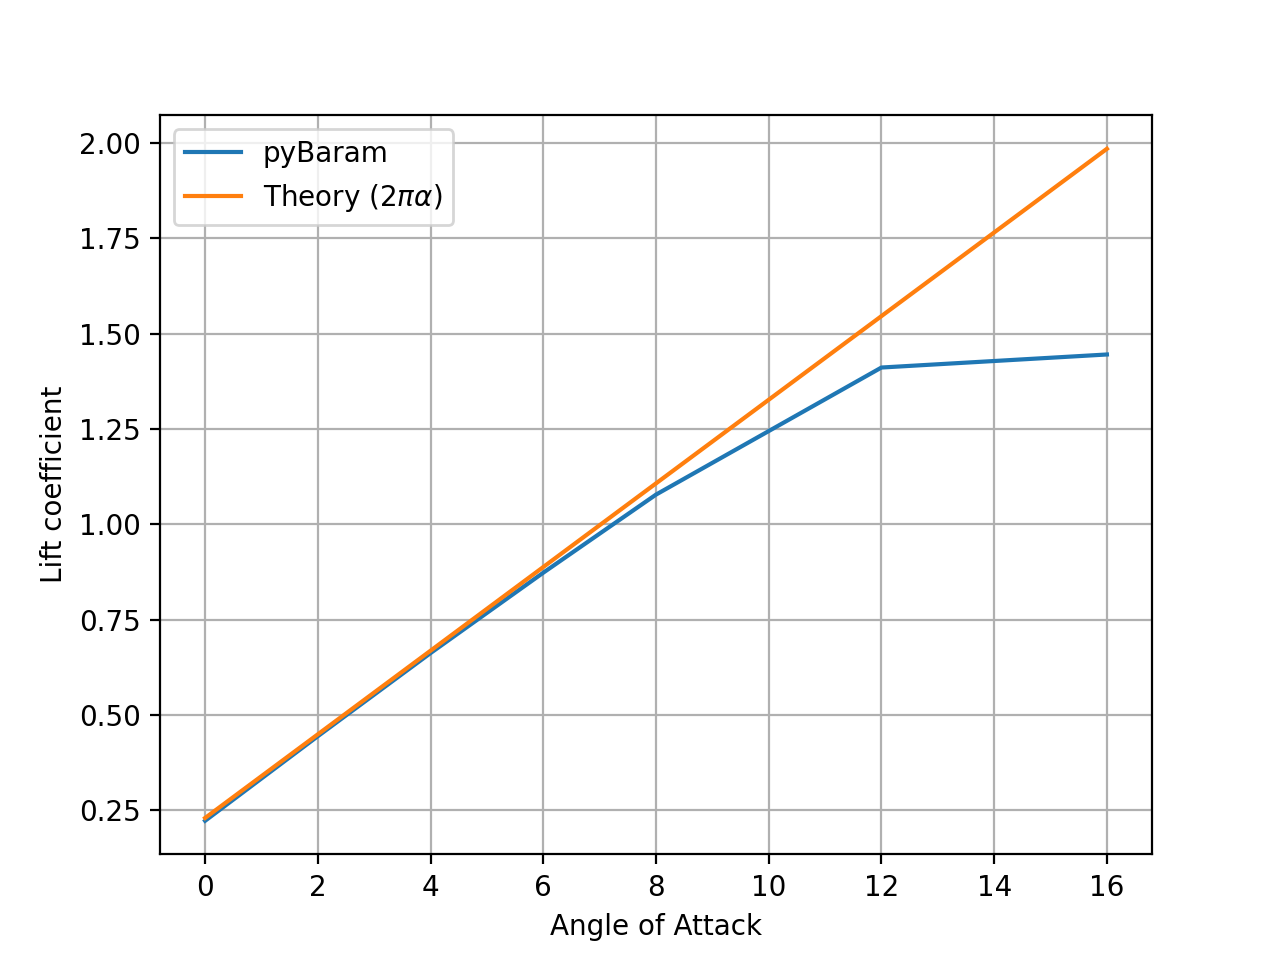

In [4]:
fig, ax = plt.subplots()
ax.plot(aoa, cl)
ax.plot(aoa, 2*np.pi*np.deg2rad(aoa + 2.1))
ax.set_xlabel('Angle of Attack')
ax.set_ylabel('Lift coefficient')
ax.legend(['pyBaram', r'Theory ($2\pi\alpha$)'])
ax.grid()
fig.savefig('cl.png', dpi=300)